In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re as re
import datetime
from scipy.stats import pearsonr
import scipy.stats as stats

In [82]:
customer_df = pd.read_csv('RetailTask1.csv')
customer_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE,COMPANY_INITIALS,MIDAGE SINGLES/COUPLES,NEW FAMILIES,OLDER FAMILIES,OLDER SINGLES/COUPLES,RETIREES,YOUNG FAMILIES,YOUNG SINGLES/COUPLES,Budget,Mainstream,Premium
0,2018-10-17,1,1000,1,5,2,6.0,175,12,0,0,0,0,0,0,1,0,0,1
1,2019-05-14,1,1307,348,66,3,6.3,175,15,1,0,0,0,0,0,0,1,0,0
2,2019-05-20,1,1343,383,61,2,2.9,170,1,1,0,0,0,0,0,0,1,0,0
3,2018-08-17,2,2373,974,69,5,15.0,175,1,1,0,0,0,0,0,0,1,0,0
4,2018-08-18,2,2426,1038,108,3,13.8,150,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
#data = customer_df.copy()
#data['MONTH_YEAR'] = data['DATE'].dt.to_period('M')

In [83]:
customer_df['DATE'] = customer_df['DATE'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))
customer_df['MONTH_YEAR'] = customer_df['DATE'].dt.strftime('%Y-%m')

In [84]:
group_month_store = customer_df.groupby(['STORE_NBR','MONTH_YEAR'],as_index=False)
group_month_store.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE,COMPANY_INITIALS,MIDAGE SINGLES/COUPLES,NEW FAMILIES,OLDER FAMILIES,OLDER SINGLES/COUPLES,RETIREES,YOUNG FAMILIES,YOUNG SINGLES/COUPLES,Budget,Mainstream,Premium,MONTH_YEAR
0,2018-10-17,1,1000,1,5,2,6.0,175,12,0,0,0,0,0,0,1,0,0,1,2018-10
1,2019-05-14,1,1307,348,66,3,6.3,175,15,1,0,0,0,0,0,0,1,0,0,2019-05
2,2019-05-20,1,1343,383,61,2,2.9,170,1,1,0,0,0,0,0,0,1,0,0,2019-05
3,2018-08-17,2,2373,974,69,5,15.0,175,1,1,0,0,0,0,0,0,1,0,0,2018-08
4,2018-08-18,2,2426,1038,108,3,13.8,150,0,1,0,0,0,0,0,0,1,0,0,2018-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246136,2019-01-22,244,244438,247365,91,2,4.2,175,15,0,0,0,0,0,0,1,0,0,1,2019-01
246440,2019-04-30,258,258090,257356,12,2,6.0,175,12,0,0,0,0,0,0,1,0,0,1,2019-04
246536,2019-01-16,263,263262,262707,107,1,2.6,150,1,0,0,0,0,0,0,1,0,0,1,2019-01
246537,2019-06-18,263,263262,262708,14,2,11.8,380,1,0,0,0,0,0,0,1,0,0,1,2019-06


In [85]:
measure_over_month = group_month_store['STORE_NBR','MONTH_YEAR']

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [86]:
measure_over_month = group_month_store['TOT_SALES'].sum()

In [87]:
total_customers = []
transactions_per_cust = []
chips_per_transac = []
price_per_unit = []
for name, group in group_month_store:
    total_customers.append(len(group['LYLTY_CARD_NBR'].unique()))
    transactions_per_cust.append(len(group['TXN_ID'].unique())/len(group['LYLTY_CARD_NBR'].unique()))
    chips_per_transac.append(group['PROD_QTY'].sum()/len(group['TXN_ID'].unique()))
    price_per_unit.append(group['TOT_SALES'].sum()/group['PROD_QTY'].sum())
measure_over_month['TOT_CUSTOMERS'] = total_customers
measure_over_month['TRANSACTIONS_PER_CUST'] = transactions_per_cust
measure_over_month['CHIPS_PER_TRANS'] = chips_per_transac
measure_over_month['PRICE_PER_UNIT'] = price_per_unit

In [8]:
measure_over_month.head()

,STORE_NBR,MONTH_YEAR,TOT_SALES,TOT_CUSTOMERS,TRANSACTIONS_PER_CUST,CHIPS_PER_TRANS,PRICE_PER_UNIT
0,1,2018-07,186.6,46,1.043478,1.187500,3.273684
1,1,2018-08,166.1,40,1.000000,1.275000,3.256863
2,1,2018-09,252.9,54,1.037037,1.196429,3.774627
3,1,2018-10,175.4,39,1.025641,1.275000,3.439216
4,1,2018-11,182.5,43,1.023256,1.227273,3.379630


Filtering the above dataframe.

In [88]:
stores = measure_over_month['STORE_NBR'].value_counts().to_dict()
i=0
stores_all_year = []

for key,value in stores.items():
    if value == 12:
        stores_all_year.append(key)
    i = i+1
print(len(stores_all_year))
stores_full_observations = measure_over_month[measure_over_month['STORE_NBR'].isin(stores_all_year)]
stores_full_observations.head()

259


,STORE_NBR,MONTH_YEAR,TOT_SALES,TOT_CUSTOMERS,TRANSACTIONS_PER_CUST,CHIPS_PER_TRANS,PRICE_PER_UNIT
0,1,2018-07,188.9,47,1.042553,1.183673,3.256897
1,1,2018-08,168.4,41,1.000000,1.268293,3.238462
2,1,2018-09,268.1,57,1.035088,1.203390,3.776056
3,1,2018-10,175.4,39,1.025641,1.275000,3.439216
4,1,2018-11,184.8,44,1.022727,1.222222,3.360000


In [89]:
pre_trial = stores_full_observations[stores_full_observations['MONTH_YEAR'] < '2019-02']

In [11]:
pre_trial.head()

,STORE_NBR,MONTH_YEAR,TOT_SALES,TOT_CUSTOMERS,TRANSACTIONS_PER_CUST,CHIPS_PER_TRANS,PRICE_PER_UNIT
0,1,2018-07,186.6,46,1.043478,1.187500,3.273684
1,1,2018-08,166.1,40,1.000000,1.275000,3.256863
2,1,2018-09,252.9,54,1.037037,1.196429,3.774627
3,1,2018-10,175.4,39,1.025641,1.275000,3.439216
4,1,2018-11,182.5,43,1.023256,1.227273,3.379630


Correlation

In [90]:
def calculateCorrelation(control_stores, metric, trial_store):
    corr_values = []
    for c in control_stores:
        corr,_= pearsonr(pre_trial[metric][pre_trial['STORE_NBR'] == c],pre_trial[metric][pre_trial['STORE_NBR'] == trial_store])
        corr_values.append(corr)
    return corr_values

In [91]:
metric = 'TOT_SALES'
trial = 77
corr_77Sales = pd.DataFrame({'STORE_NBR':pre_trial['STORE_NBR'].unique()})
corr_77Sales['CORR_SALES'] = calculateCorrelation(pre_trial['STORE_NBR'].unique(),metric,trial)

In [92]:
metric = 'TOT_CUSTOMERS'
trial = 77
corr_77Customers = pd.DataFrame({'STORE_NBR':pre_trial['STORE_NBR'].unique()})
corr_77Customers['CORR_CUSTOMERS'] = calculateCorrelation(pre_trial['STORE_NBR'].unique(),metric,trial)

In [93]:
def calculateMagnitudeDistance(control_stores, metric, trial_store, months):
    count = 0
    values = {}
    list_values = []
    for c in control_stores:
        for m in months:
            v1 = (pre_trial[metric][(pre_trial['STORE_NBR'] == trial_store) & (pre_trial['MONTH_YEAR'] == m)]).values[0]
            v2 = (pre_trial[metric][(pre_trial['STORE_NBR'] == c) & (pre_trial['MONTH_YEAR'] == m)]).values[0]
            measure = abs(v1 - v2)
            values[count] = round(measure,2)
            count = count+1
    [list_values.extend([v]) for k,v in values.items()]
    return list_values

In [94]:
metric = 'TOT_SALES'
trial = 77
months = ['2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2019-01']
magnitude_77Sales = pd.DataFrame({'STORE_NBR':pre_trial['STORE_NBR']})
magnitude_77Sales['MONTH_YEAR'] = pre_trial['MONTH_YEAR']
magnitude_77Sales['MAG_SALES'] = calculateMagnitudeDistance(pre_trial['STORE_NBR'].unique(),metric,trial, months)

In [95]:
metric = 'TOT_CUSTOMERS'
trial = 77
months = ['2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2019-01']
magnitude_77Customers = pd.DataFrame({'STORE_NBR':pre_trial['STORE_NBR']})
magnitude_77Customers['MONTH_YEAR'] = pre_trial['MONTH_YEAR']
magnitude_77Customers['MAG_CUSTOMERS'] = calculateMagnitudeDistance(pre_trial['STORE_NBR'].unique(),metric,trial, months)

In [18]:
magnitude_77Customers.head()

,STORE_NBR,MONTH_YEAR,MAG_CUSTOMERS
0,1,2018-07,1
1,1,2018-08,5
2,1,2018-09,14
3,1,2018-10,7
4,1,2018-11,6


In [96]:
min_values = {}
max_values = {}
def calculateMinMax(mag_df, control_stores, metric, months):
    for m in months:
        min_values[m] = min(mag_df[metric][(mag_df['MONTH_YEAR'] == m)])
        max_values[m] = max(mag_df[metric][(mag_df['MONTH_YEAR'] == m)])
    std_measures_list = []
    for c in control_stores:
        for m in months:
            measure = mag_df[metric][(mag_df['STORE_NBR'] == c) & (mag_df['MONTH_YEAR'] == m)]
            std_measure =  1 - (measure - min_values[m])/(max_values[m] - min_values[m])
            std_measures_list.append(std_measure.values[0])
    return std_measures_list

In [97]:
months_list = ['2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2019-01']
magnitude_77Sales['STD_SALES'] = calculateMinMax(magnitude_77Sales,magnitude_77Sales['STORE_NBR'].unique(),'MAG_SALES', months_list)

In [98]:
months_list = ['2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2019-01']
magnitude_77Customers['STD_CUSTOMERS'] = calculateMinMax(magnitude_77Customers,magnitude_77Customers['STORE_NBR'].unique(),'MAG_CUSTOMERS', months_list)

In [22]:
magnitude_77Sales.head()

,STORE_NBR,MONTH_YEAR,MAG_SALES,STD_SALES
0,1,2018-07,70.9,0.943618
1,1,2018-08,72.8,0.932241
2,1,2018-09,36.1,0.968233
3,1,2018-10,3.2,0.997463
4,1,2018-11,33.5,0.974191


Combining correlation and magnitude scores by averaging them(both having equal weightage)

In [99]:
def combineValues(corr_df, mag_df,corr_metric, mag_metric, control_stores, months):
    average_values = []
    for c in control_stores:
        corr_value = corr_df[corr_metric][corr_df['STORE_NBR'] == c]
        for m in months:
            mag_value = mag_df[mag_metric][(mag_df['STORE_NBR'] == c) & (mag_df['MONTH_YEAR'] == m)]
            average = 0.5*(corr_value.values[0]) + 0.5*(mag_value.values[0])
            average_values.append(average)
    return average_values

In [100]:
corr_metric = 'CORR_SALES'
mag_metric = 'STD_SALES'
months = ['2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2019-01']
score_77Sales = pd.DataFrame({'STORE_NBR':pre_trial['STORE_NBR']})
score_77Sales['MONTH_YEAR'] = pre_trial['MONTH_YEAR']
score_77Sales['AVERAGE_SALES'] = combineValues(corr_77Sales,magnitude_77Sales,corr_metric,mag_metric,
                                         magnitude_77Sales['STORE_NBR'].unique(), months)

In [101]:
corr_metric = 'CORR_CUSTOMERS'
mag_metric = 'STD_CUSTOMERS'
months = ['2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2019-01']
score_77Customers = pd.DataFrame({'STORE_NBR':pre_trial['STORE_NBR']})
score_77Customers['MONTH_YEAR'] = pre_trial['MONTH_YEAR']
score_77Customers['AVERAGE_CUSTOMERS'] = combineValues(corr_77Customers,magnitude_77Customers,corr_metric,mag_metric,
                                         magnitude_77Customers['STORE_NBR'].unique(), months)

In [102]:
score_77_Control = pd.merge(score_77Sales, score_77Customers, on=['STORE_NBR','MONTH_YEAR'],how='inner')
score_77_Control.head()

,STORE_NBR,MONTH_YEAR,AVERAGE_SALES,AVERAGE_CUSTOMERS
0,1,2018-07,0.465422,0.668933
1,1,2018-08,0.460498,0.639863
2,1,2018-09,0.474907,0.575526
3,1,2018-10,0.489889,0.653933
4,1,2018-11,0.481960,0.643423


In [103]:
score_77_Control['finalControlScore'] = 0.5*score_77_Control['AVERAGE_SALES'] + 0.5*score_77_Control['AVERAGE_CUSTOMERS']
score_77_Control.head()

,STORE_NBR,MONTH_YEAR,AVERAGE_SALES,AVERAGE_CUSTOMERS,finalControlScore
0,1,2018-07,0.465422,0.668933,0.567177
1,1,2018-08,0.460498,0.639863,0.550180
2,1,2018-09,0.474907,0.575526,0.525217
3,1,2018-10,0.489889,0.653933,0.571911
4,1,2018-11,0.481960,0.643423,0.562691


In [104]:
avg_control_score = {}
control_stores = score_77_Control['STORE_NBR'].unique()
for c in control_stores:
    avg_control_score[c] = round(score_77_Control['finalControlScore'][(score_77_Control['STORE_NBR'] == c)].mean(),2)    

Sort scores, the control score next to trial store(77) has similar trend to it.

In [105]:
avg_control_score = {k: v for k, v in sorted(avg_control_score.items(), key=lambda item: item[1])}
print(avg_control_score)

{75: -0.18, 138: -0.08, 147: -0.08, 227: -0.08, 4: -0.07, 247: -0.07, 19: -0.05, 55: -0.04, 102: -0.02, 179: -0.02, 172: -0.01, 24: 0.0, 165: 0.0, 208: 0.01, 49: 0.02, 80: 0.03, 186: 0.03, 269: 0.03, 242: 0.04, 9: 0.05, 67: 0.05, 201: 0.05, 65: 0.06, 210: 0.06, 125: 0.07, 133: 0.07, 129: 0.09, 155: 0.09, 180: 0.09, 58: 0.1, 223: 0.1, 258: 0.1, 54: 0.11, 160: 0.11, 169: 0.11, 231: 0.11, 267: 0.11, 194: 0.12, 226: 0.12, 261: 0.12, 86: 0.13, 100: 0.13, 137: 0.13, 166: 0.13, 244: 0.13, 78: 0.14, 158: 0.14, 97: 0.15, 7: 0.16, 95: 0.16, 107: 0.16, 184: 0.16, 209: 0.16, 61: 0.17, 89: 0.17, 110: 0.17, 154: 0.17, 183: 0.17, 238: 0.17, 241: 0.17, 116: 0.18, 130: 0.18, 101: 0.19, 114: 0.19, 207: 0.19, 216: 0.19, 22: 0.2, 40: 0.2, 156: 0.2, 8: 0.21, 88: 0.21, 259: 0.21, 59: 0.22, 79: 0.22, 94: 0.22, 217: 0.22, 70: 0.23, 106: 0.23, 123: 0.23, 198: 0.23, 13: 0.24, 224: 0.24, 2: 0.25, 32: 0.25, 90: 0.25, 109: 0.25, 213: 0.25, 15: 0.26, 25: 0.26, 43: 0.26, 52: 0.26, 91: 0.26, 112: 0.26, 152: 0.26, 266

I find control store 233 as the most similar to 77 trial store.

Visualize total sales of different store type(Pre trial).

In [106]:
measure_over_month_sales = measure_over_month[['STORE_NBR','MONTH_YEAR','TOT_SALES']]

In [107]:
trial_store = 77
control_store = 233
pastSalesTrial = measure_over_month_sales[['MONTH_YEAR','TOT_SALES']][(measure_over_month_sales['STORE_NBR'] == trial_store) & 
                                          (measure_over_month_sales['MONTH_YEAR'] < '2019-02')].reset_index(drop=True)
pastSalesControl = measure_over_month_sales[['MONTH_YEAR','TOT_SALES']][(measure_over_month_sales['STORE_NBR'] == control_store) & 
                                            (measure_over_month_sales['MONTH_YEAR'] < '2019-02')].reset_index(drop=True)

In [108]:
months = ['2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2019-01']
other_stores = np.setdiff1d(measure_over_month_sales['STORE_NBR'].unique(),[trial_store,control_store])
pastSalesOthers = pd.DataFrame({'MONTH_YEAR':measure_over_month_sales['MONTH_YEAR'].unique()[0:7]})
avg_sales = []

for m in months:
    measure = measure_over_month_sales['TOT_SALES'][(measure_over_month_sales['STORE_NBR'].isin(other_stores)) & 
                             (measure_over_month_sales['MONTH_YEAR'] == m)]
    avg_sales.append(measure.mean())
    
pastSalesOthers['AVG_SALES'] = avg_sales
pastSalesOthers

,MONTH_YEAR,AVG_SALES
0,2018-07,587.690458
1,2018-08,562.888314
2,2018-09,571.073282
3,2018-10,582.131179
4,2018-11,569.382061
5,2018-12,597.475096
6,2019-01,579.520690


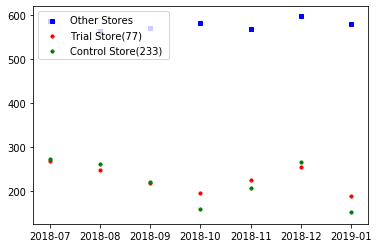

In [109]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(pastSalesOthers['MONTH_YEAR'], pastSalesOthers['AVG_SALES'], s=10, c='b', marker="s", label='Other Stores')
ax1.scatter(pastSalesTrial['MONTH_YEAR'],pastSalesTrial['TOT_SALES'], s=10, c='r', marker="o", label='Trial Store(77)')
ax1.scatter(pastSalesControl['MONTH_YEAR'],pastSalesControl['TOT_SALES'], s=10, c='g', marker="o", label='Control Store(233) ')
plt.legend(loc='upper left')
plt.show()

Visualize number of customers per month(pre trial)

In [110]:
measure_over_month_customers = measure_over_month[['STORE_NBR','MONTH_YEAR','TOT_CUSTOMERS']]

In [111]:
trial_store = 77
control_store = 233
pastCustomersTrial = measure_over_month_customers[['MONTH_YEAR','TOT_CUSTOMERS']][(measure_over_month_customers['STORE_NBR'] == trial_store) & 
                                          (measure_over_month_customers['MONTH_YEAR'] < '2019-02')].reset_index(drop=True)
pastCustomersControl = measure_over_month_customers[['MONTH_YEAR','TOT_CUSTOMERS']][(measure_over_month_customers['STORE_NBR'] == control_store) & 
                                            (measure_over_month_customers['MONTH_YEAR'] < '2019-02')].reset_index(drop=True)

In [112]:
months = ['2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2019-01']
other_stores = np.setdiff1d(measure_over_month_customers['STORE_NBR'].unique(),[trial_store,control_store])
pastCustomersOthers = pd.DataFrame({'MONTH_YEAR':measure_over_month_customers['MONTH_YEAR'].unique()[0:7]})
avg_customers = []

for m in months:
    measure = measure_over_month_customers['TOT_CUSTOMERS'][(measure_over_month_customers['STORE_NBR'].isin(other_stores)) & 
                             (measure_over_month_customers['MONTH_YEAR'] == m)]
    avg_customers.append(measure.mean())
    
pastCustomersOthers['AVG_CUSTOMERS'] = avg_customers
pastCustomersOthers

,MONTH_YEAR,AVG_CUSTOMERS
0,2018-07,67.202290
1,2018-08,67.245211
2,2018-09,65.404580
3,2018-10,66.418251
4,2018-11,65.534351
5,2018-12,68.360153
6,2019-01,66.440613


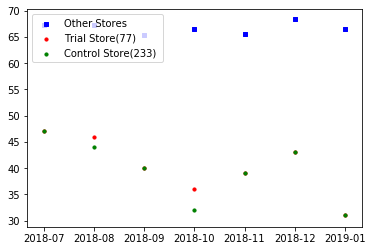

In [113]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(pastCustomersOthers['MONTH_YEAR'], pastCustomersOthers['AVG_CUSTOMERS'], s=10, c='b', marker="s", label='Other Stores')
ax1.scatter(pastCustomersTrial['MONTH_YEAR'],pastCustomersTrial['TOT_CUSTOMERS'], s=10, c='r', marker="o", label='Trial Store(77)')
ax1.scatter(pastCustomersControl['MONTH_YEAR'],pastCustomersControl['TOT_CUSTOMERS'], s=10, c='g', marker="o", label='Control Store(233) ')
plt.legend(loc='upper left')
plt.show()

Comparison of results in trial period.

In [114]:
scaling_factor = pastSalesTrial['TOT_SALES'].sum()/pastSalesControl['TOT_SALES'].sum()
scaling_factor

1.0397523623330076

In [115]:
salesControl = pd.DataFrame({'MONTH_YEAR':measure_over_month_sales['MONTH_YEAR'].unique()})
salesControl['CONTROL_SALES'] = measure_over_month_sales[['TOT_SALES']][measure_over_month_sales['STORE_NBR'] == control_store].reset_index(drop=True) * scaling_factor
salesControl

,MONTH_YEAR,CONTROL_SALES
0,2018-07,281.980841
1,2018-08,271.063441
2,2018-09,229.681297
3,2018-10,165.632551
4,2018-11,214.708863
5,2018-12,275.950277
6,2019-01,156.482731
7,2019-02,229.473346
8,2019-03,187.779277
9,2019-04,149.932291


In [116]:
percentageDiff = pd.DataFrame({'MONTH_YEAR':measure_over_month_sales['MONTH_YEAR'].unique()})
salesTrial = measure_over_month_sales[['TOT_SALES']][(measure_over_month_sales['STORE_NBR'] == trial_store)].reset_index(drop=True)
percentageDiff['%Diff'] = abs(salesControl['CONTROL_SALES'] - salesTrial['TOT_SALES'])/salesControl['CONTROL_SALES']
percentageDiff

,MONTH_YEAR,%Diff
0,2018-07,0.048162
1,2018-08,0.086930
2,2018-09,0.056083
3,2018-10,0.173079
4,2018-11,0.047465
5,2018-12,0.075196
6,2019-01,0.203967
7,2019-02,0.077889
8,2019-03,0.358510
9,2019-04,0.721444


 As our null hypothesis is that the trial period is the same as the pre-trial
period, let's take the standard deviation based on the scaled percentage difference
in the pre-trial period 

In [117]:
standardDev_77_233 = percentageDiff['%Diff'][percentageDiff['MONTH_YEAR'] < '2019-02'].values.std()
standardDev_77_233

0.058918254528981466

 We will test with a null hypothesis of there being 0 difference between trial and control stores

T Test- ratio of difference between the two groups and difference within the groups.

In [118]:
months = ['2019-02','2019-03','2019-04']
stores_TValues_77_233 = pd.DataFrame({'TRANSACTION_MONTH':months})
tvalues = []
for m in months:
    tvalues.append((percentageDiff['%Diff'][percentageDiff['MONTH_YEAR'] == m].values[0] - 0)/standardDev_77_233)
stores_TValues_77_233['TVALUE'] = tvalues

In [119]:
stores_TValues_77_233.head()

,TRANSACTION_MONTH,TVALUE
0,2019-02,1.321977
1,2019-03,6.084869
2,2019-04,12.244825


In [54]:
stats.t.ppf(0.95, 7)

1.894578605061305

Tvalues of march and april is significantly higher than the 95th percentile value

Sales:

In [173]:
trial_store = 77
control_store = 233
allSalesTrial = measure_over_month_sales[['MONTH_YEAR','TOT_SALES']][(measure_over_month_sales['STORE_NBR'] == trial_store)].reset_index(drop=True)
allSalesControl = measure_over_month_sales[['MONTH_YEAR','TOT_SALES']][(measure_over_month_sales['STORE_NBR'] == control_store)].reset_index(drop=True)

In [184]:
allSalesControl_95['MONTH_YEAR'] = allSalesControl[['MONTH_YEAR']]
allSalesControl_05 = allSalesControl[['MONTH_YEAR']]

allSalesControl_95['TOT_SALES'] = allSalesControl[['TOT_SALES']]*(1 + standardDev_77_233 * 2)
allSalesControl_05['TOT_SALES'] = allSalesControl[['TOT_SALES']]*(1 - standardDev_77_233 * 2)

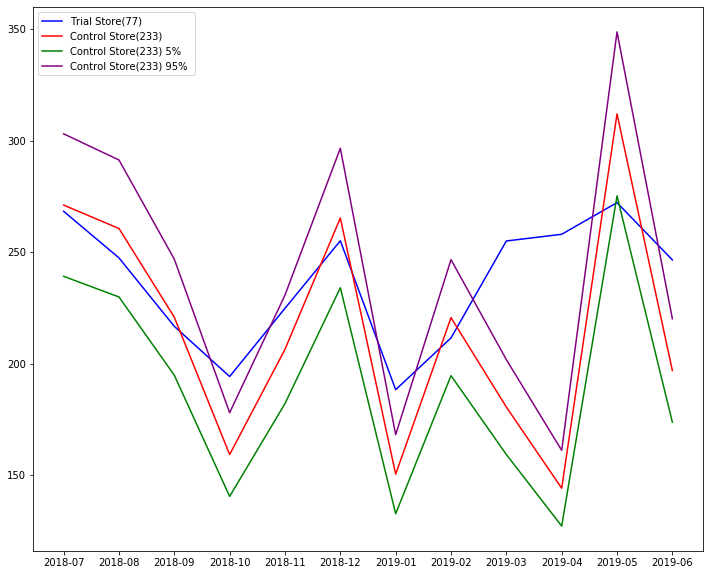

In [190]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(111)

ax1.plot(allSalesTrial['MONTH_YEAR'], allSalesTrial['TOT_SALES'], c='b', label='Trial Store(77)')
ax1.plot(allSalesControl['MONTH_YEAR'],allSalesControl['TOT_SALES'], c='r', label='Control Store(233)')
ax1.plot(allSalesControl_05['MONTH_YEAR'],allSalesControl_05['TOT_SALES'], c='g', label='Control Store(233) 5% ')
ax1.plot(allSalesControl_95['MONTH_YEAR'],allSalesControl_95['TOT_SALES'], c='purple', label='Control Store(233) 95% ')
plt.legend(loc='upper left')
plt.show()

Customers:

In [192]:
trial_store = 77
control_store = 233
allCustomersTrial = measure_over_month_customers[['MONTH_YEAR','TOT_CUSTOMERS']][(measure_over_month_customers['STORE_NBR'] == trial_store)].reset_index(drop=True)
allCustomersControl = measure_over_month_customers[['MONTH_YEAR','TOT_CUSTOMERS']][(measure_over_month_customers['STORE_NBR'] == control_store)].reset_index(drop=True)

In [196]:
allCustomersControl_95 = allCustomersControl[['MONTH_YEAR']]
allCustomersControl_05 = allCustomersControl[['MONTH_YEAR']]

allCustomersControl_95['TOT_CUSTOMERS'] = allCustomersControl[['TOT_CUSTOMERS']]*(1 + standardDev_77_233 * 2)
allCustomersControl_05['TOT_CUSTOMERS'] = allCustomersControl[['TOT_CUSTOMERS']]*(1 - standardDev_77_233 * 2)

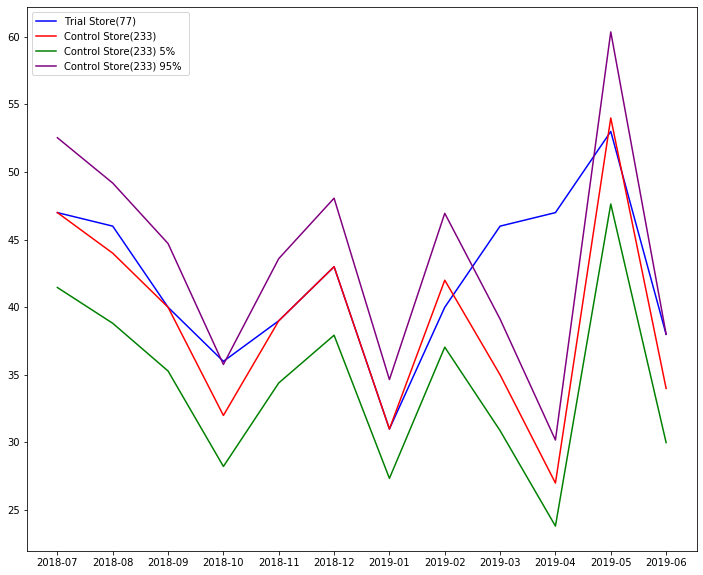

In [197]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(111)

ax1.plot(allCustomersTrial['MONTH_YEAR'], allCustomersTrial['TOT_CUSTOMERS'], c='b', label='Trial Store(77)')
ax1.plot(allCustomersControl['MONTH_YEAR'],allCustomersControl['TOT_CUSTOMERS'], c='r', label='Control Store(233)')
ax1.plot(allCustomersControl_05['MONTH_YEAR'],allCustomersControl_05['TOT_CUSTOMERS'], c='g', label='Control Store(233) 5% ')
ax1.plot(allCustomersControl_95['MONTH_YEAR'],allCustomersControl_95['TOT_CUSTOMERS'], c='purple', label='Control Store(233) 95% ')
plt.legend(loc='upper left')
plt.show()

Number of customers and sales are significantly higher than the control store in trial period.

Trial Store 86

Correlation and Magnitude:

In [120]:
metric = 'TOT_SALES'
trial = 86
corr_86Sales = pd.DataFrame({'STORE_NBR':pre_trial['STORE_NBR'].unique()})
corr_86Sales['CORR_SALES'] = calculateCorrelation(pre_trial['STORE_NBR'].unique(),metric,trial)

In [121]:
metric = 'TOT_CUSTOMERS'
trial = 86
corr_86Customers = pd.DataFrame({'STORE_NBR':pre_trial['STORE_NBR'].unique()})
corr_86Customers['CORR_CUSTOMERS'] = calculateCorrelation(pre_trial['STORE_NBR'].unique(),metric,trial)

In [122]:
metric = 'TOT_SALES'
trial = 86
months = ['2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2019-01']
magnitude_86Sales = pd.DataFrame({'STORE_NBR':pre_trial['STORE_NBR']})
magnitude_86Sales['MONTH_YEAR'] = pre_trial['MONTH_YEAR']
magnitude_86Sales['MAG_SALES'] = calculateMagnitudeDistance(pre_trial['STORE_NBR'].unique(),metric,trial, months)

In [123]:
metric = 'TOT_CUSTOMERS'
trial = 86
months = ['2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2019-01']
magnitude_86Customers = pd.DataFrame({'STORE_NBR':pre_trial['STORE_NBR']})
magnitude_86Customers['MONTH_YEAR'] = pre_trial['MONTH_YEAR']
magnitude_86Customers['MAG_CUSTOMERS'] = calculateMagnitudeDistance(pre_trial['STORE_NBR'].unique(),metric,trial, months)

In [124]:
months_list = ['2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2019-01']
magnitude_86Sales['STD_SALES'] = calculateMinMax(magnitude_86Sales,magnitude_86Sales['STORE_NBR'].unique(),'MAG_SALES', months_list)

In [125]:
months_list = ['2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2019-01']
magnitude_86Customers['STD_CUSTOMERS'] = calculateMinMax(magnitude_86Customers,magnitude_86Customers['STORE_NBR'].unique(),'MAG_CUSTOMERS', months_list)

Combined score composed of Correlation and Magnitude

In [126]:
corr_metric = 'CORR_SALES'
mag_metric = 'STD_SALES'
months = ['2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2019-01']
score_86Sales = pd.DataFrame({'STORE_NBR':pre_trial['STORE_NBR']})
score_86Sales['MONTH_YEAR'] = pre_trial['MONTH_YEAR']
score_86Sales['AVERAGE_SALES'] = combineValues(corr_86Sales,magnitude_86Sales,corr_metric,mag_metric,
                                         magnitude_86Sales['STORE_NBR'].unique(), months)

In [127]:
corr_metric = 'CORR_CUSTOMERS'
mag_metric = 'STD_CUSTOMERS'
months = ['2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2019-01']
score_86Customers = pd.DataFrame({'STORE_NBR':pre_trial['STORE_NBR']})
score_86Customers['MONTH_YEAR'] = pre_trial['MONTH_YEAR']
score_86Customers['AVERAGE_CUSTOMERS'] = combineValues(corr_86Customers,magnitude_86Customers,corr_metric,mag_metric,
                                         magnitude_86Customers['STORE_NBR'].unique(), months)

In [128]:
score_86_Control = pd.merge(score_86Sales, score_86Customers, on=['STORE_NBR','MONTH_YEAR'],how='inner')
score_86_Control.head()

,STORE_NBR,MONTH_YEAR,AVERAGE_SALES,AVERAGE_CUSTOMERS
0,1,2018-07,0.290592,0.439501
1,1,2018-08,0.292469,0.408856
2,1,2018-09,0.334347,0.472802
3,1,2018-10,0.274588,0.371801
4,1,2018-11,0.287018,0.417996


In [129]:
score_86_Control['finalControlScore'] = 0.5*score_86_Control['AVERAGE_SALES'] + 0.5*score_86_Control['AVERAGE_CUSTOMERS']
score_86_Control.head()

,STORE_NBR,MONTH_YEAR,AVERAGE_SALES,AVERAGE_CUSTOMERS,finalControlScore
0,1,2018-07,0.290592,0.439501,0.365046
1,1,2018-08,0.292469,0.408856,0.350663
2,1,2018-09,0.334347,0.472802,0.403575
3,1,2018-10,0.274588,0.371801,0.323194
4,1,2018-11,0.287018,0.417996,0.352507


In [130]:
avg_control_score_86 = {}
control_stores = score_86_Control['STORE_NBR'].unique()
for c in control_stores:
    avg_control_score_86[c] = round(score_86_Control['finalControlScore'][(score_86_Control['STORE_NBR'] == c)].mean(),2)    

Sort scores, the control score next to trial store(86) has similar trend to it.

In [131]:
avg_control_score_86 = {k: v for k, v in sorted(avg_control_score_86.items(), key=lambda item: item[1])}
print(avg_control_score_86)

{146: -0.32, 42: -0.29, 120: -0.23, 192: -0.22, 52: -0.21, 135: -0.18, 185: -0.16, 51: -0.15, 108: -0.15, 254: -0.15, 267: -0.15, 127: -0.13, 149: -0.12, 174: -0.11, 256: -0.11, 258: -0.11, 41: -0.1, 161: -0.09, 214: -0.08, 27: -0.07, 224: -0.07, 21: -0.05, 96: -0.04, 68: -0.02, 111: -0.02, 115: -0.02, 2: -0.01, 35: -0.01, 264: -0.01, 16: -0.0, 151: 0.01, 233: 0.01, 29: 0.02, 243: 0.03, 37: 0.04, 238: 0.04, 186: 0.06, 195: 0.06, 268: 0.06, 77: 0.07, 245: 0.07, 270: 0.07, 23: 0.08, 124: 0.08, 141: 0.08, 143: 0.08, 265: 0.08, 53: 0.09, 142: 0.09, 263: 0.09, 14: 0.1, 50: 0.1, 66: 0.1, 175: 0.1, 191: 0.1, 239: 0.1, 47: 0.11, 63: 0.11, 150: 0.11, 187: 0.11, 9: 0.12, 121: 0.12, 99: 0.13, 173: 0.13, 38: 0.14, 140: 0.14, 154: 0.14, 8: 0.15, 82: 0.15, 103: 0.15, 126: 0.15, 248: 0.15, 244: 0.16, 266: 0.16, 12: 0.17, 200: 0.17, 205: 0.17, 215: 0.17, 158: 0.18, 17: 0.19, 139: 0.19, 167: 0.19, 182: 0.19, 197: 0.19, 204: 0.19, 230: 0.19, 234: 0.19, 250: 0.19, 272: 0.19, 118: 0.2, 131: 0.2, 159: 0.2,

I find control store 155 as the most similar to 86 trial store.

Visualize total sales of different store type(Pre trial).

In [132]:
measure_over_month_sales = measure_over_month[['STORE_NBR','MONTH_YEAR','TOT_SALES']]

In [133]:
trial_store = 86
control_store = 155
pastSalesTrial = measure_over_month_sales[['MONTH_YEAR','TOT_SALES']][(measure_over_month_sales['STORE_NBR'] == trial_store) & 
                                          (measure_over_month_sales['MONTH_YEAR'] < '2019-02')].reset_index(drop=True)
pastSalesControl = measure_over_month_sales[['MONTH_YEAR','TOT_SALES']][(measure_over_month_sales['STORE_NBR'] == control_store) & 
                                            (measure_over_month_sales['MONTH_YEAR'] < '2019-02')].reset_index(drop=True)

In [134]:
months = ['2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2019-01']
other_stores = np.setdiff1d(measure_over_month_sales['STORE_NBR'].unique(),[trial_store,control_store])
pastSalesOthers = pd.DataFrame({'MONTH_YEAR':measure_over_month_sales['MONTH_YEAR'].unique()[0:7]})
avg_sales = []

for m in months:
    measure = measure_over_month_sales['TOT_SALES'][(measure_over_month_sales['STORE_NBR'].isin(other_stores)) & 
                             (measure_over_month_sales['MONTH_YEAR'] == m)]
    avg_sales.append(measure.mean())
    
pastSalesOthers['AVG_SALES'] = avg_sales
pastSalesOthers

,MONTH_YEAR,AVG_SALES
0,2018-07,583.064504
1,2018-08,559.220307
2,2018-09,565.894275
3,2018-10,576.582890
4,2018-11,564.592748
5,2018-12,593.293487
6,2019-01,574.554023


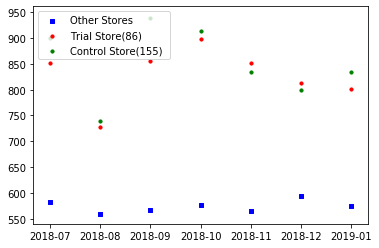

In [135]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(pastSalesOthers['MONTH_YEAR'], pastSalesOthers['AVG_SALES'], s=10, c='b', marker="s", label='Other Stores')
ax1.scatter(pastSalesTrial['MONTH_YEAR'],pastSalesTrial['TOT_SALES'], s=10, c='r', marker="o", label='Trial Store(86)')
ax1.scatter(pastSalesControl['MONTH_YEAR'],pastSalesControl['TOT_SALES'], s=10, c='g', marker="o", label='Control Store(155) ')
plt.legend(loc='upper left')
plt.show()

Visualize number of customers per month(pre trial)

In [136]:
measure_over_month_customers = measure_over_month[['STORE_NBR','MONTH_YEAR','TOT_CUSTOMERS']]

In [137]:
trial_store = 86
control_store = 155
pastCustomersTrial = measure_over_month_customers[['MONTH_YEAR','TOT_CUSTOMERS']][(measure_over_month_customers['STORE_NBR'] == trial_store) & 
                                          (measure_over_month_customers['MONTH_YEAR'] < '2019-02')].reset_index(drop=True)
pastCustomersControl = measure_over_month_customers[['MONTH_YEAR','TOT_CUSTOMERS']][(measure_over_month_customers['STORE_NBR'] == control_store) & 
                                            (measure_over_month_customers['MONTH_YEAR'] < '2019-02')].reset_index(drop=True)

In [138]:
months = ['2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2019-01']
other_stores = np.setdiff1d(measure_over_month_customers['STORE_NBR'].unique(),[trial_store,control_store])
pastCustomersOthers = pd.DataFrame({'MONTH_YEAR':measure_over_month_customers['MONTH_YEAR'].unique()[0:7]})
avg_customers = []

for m in months:
    measure = measure_over_month_customers['TOT_CUSTOMERS'][(measure_over_month_customers['STORE_NBR'].isin(other_stores)) & 
                             (measure_over_month_customers['MONTH_YEAR'] == m)]
    avg_customers.append(measure.mean())
    
pastCustomersOthers['AVG_CUSTOMERS'] = avg_customers
pastCustomersOthers

,MONTH_YEAR,AVG_CUSTOMERS
0,2018-07,66.828244
1,2018-08,66.900383
2,2018-09,64.961832
3,2018-10,65.878327
4,2018-11,65.103053
5,2018-12,67.984674
6,2019-01,65.984674


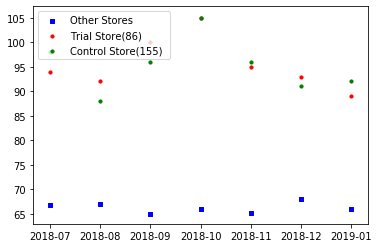

In [139]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(pastCustomersOthers['MONTH_YEAR'], pastCustomersOthers['AVG_CUSTOMERS'], s=10, c='b', marker="s", label='Other Stores')
ax1.scatter(pastCustomersTrial['MONTH_YEAR'],pastCustomersTrial['TOT_CUSTOMERS'], s=10, c='r', marker="o", label='Trial Store(86)')
ax1.scatter(pastCustomersControl['MONTH_YEAR'],pastCustomersControl['TOT_CUSTOMERS'], s=10, c='g', marker="o", label='Control Store(155) ')
plt.legend(loc='upper left')
plt.show()

Comparison of results in trial period.

In [140]:
scaling_factor = pastSalesTrial['TOT_SALES'].sum()/pastSalesControl['TOT_SALES'].sum()
scaling_factor

0.9720493769183034

In [141]:
salesControl_155 = pd.DataFrame({'MONTH_YEAR':measure_over_month_sales['MONTH_YEAR'].unique()})
salesControl_155['CONTROL_SALES'] = measure_over_month_sales[['TOT_SALES']][measure_over_month_sales['STORE_NBR'] == control_store].reset_index(drop=True) * scaling_factor
salesControl_155

,MONTH_YEAR,CONTROL_SALES
0,2018-07,875.427669
1,2018-08,718.052875
2,2018-09,913.337595
3,2018-10,888.453131
4,2018-11,811.661230
5,2018-12,777.445092
6,2019-01,811.272410
7,2019-02,827.019610
8,2019-03,745.561872
9,2019-04,778.028321


In [142]:
percentageDiff_86_155 = pd.DataFrame({'MONTH_YEAR':measure_over_month_sales['MONTH_YEAR'].unique()})
salesTrial_86 = measure_over_month_sales[['TOT_SALES']][(measure_over_month_sales['STORE_NBR'] == trial_store)].reset_index(drop=True)
percentageDiff_86_155['%Diff'] = abs(salesControl_155['CONTROL_SALES'] - salesTrial_86['TOT_SALES'])/salesControl_155['CONTROL_SALES']
percentageDiff_86_155

,MONTH_YEAR,%Diff
0,2018-07,0.027904
1,2018-08,0.012251
2,2018-09,0.063873
3,2018-10,0.011646
4,2018-11,0.048713
5,2018-12,0.044704
6,2019-01,0.013155
7,2019-02,0.055356
8,2019-03,0.268037
9,2019-04,0.033381


 As our null hypothesis is that the trial period is the same as the pre-trial
period, let's take the standard deviation based on the scaled percentage difference
in the pre-trial period 

In [143]:
standardDev_86_155 = percentageDiff_86_155['%Diff'][percentageDiff_86_155['MONTH_YEAR'] < '2019-02'].std()
standardDev_86_155

0.02094588844624414

In [144]:
months = ['2019-02','2019-03','2019-04']
stores_TValues_86_155 = pd.DataFrame({'TRANSACTION_MONTH':months})
tvalues = []
for m in months:
    tvalues.append((percentageDiff_86_155['%Diff'][percentageDiff_86_155['MONTH_YEAR'] == m].values[0] - 0)/standardDev_86_155)
stores_TValues_86_155['TVALUE'] = tvalues

In [145]:
stores_TValues_86_155.head()

,TRANSACTION_MONTH,TVALUE
0,2019-02,2.642804
1,2019-03,12.796638
2,2019-04,1.593697


Sales:

In [198]:
trial_store = 86
control_store = 155
allSalesTrial = measure_over_month_sales[['MONTH_YEAR','TOT_SALES']][(measure_over_month_sales['STORE_NBR'] == trial_store)].reset_index(drop=True)
allSalesControl = measure_over_month_sales[['MONTH_YEAR','TOT_SALES']][(measure_over_month_sales['STORE_NBR'] == control_store)].reset_index(drop=True)

In [199]:
allSalesControl_95['MONTH_YEAR'] = allSalesControl[['MONTH_YEAR']]
allSalesControl_05 = allSalesControl[['MONTH_YEAR']]

allSalesControl_95['TOT_SALES'] = allSalesControl[['TOT_SALES']]*(1 + standardDev_86_155 * 2)
allSalesControl_05['TOT_SALES'] = allSalesControl[['TOT_SALES']]*(1 - standardDev_86_155 * 2)

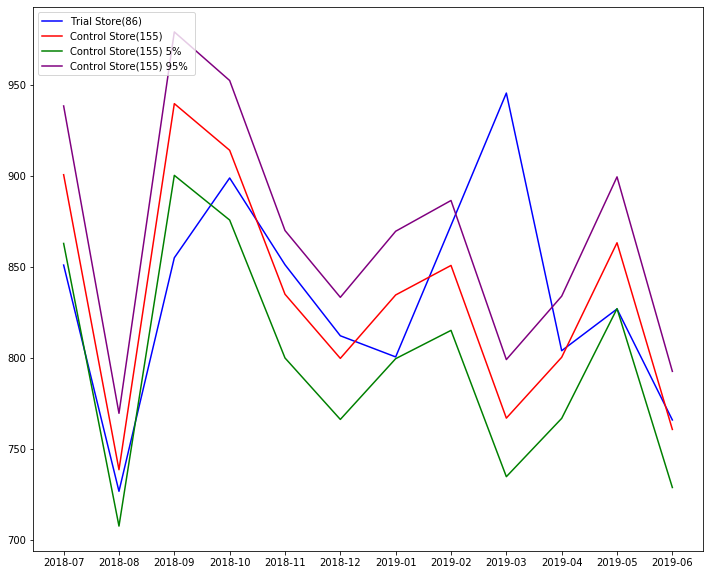

In [200]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(111)

ax1.plot(allSalesTrial['MONTH_YEAR'], allSalesTrial['TOT_SALES'], c='b', label='Trial Store(86)')
ax1.plot(allSalesControl['MONTH_YEAR'],allSalesControl['TOT_SALES'], c='r', label='Control Store(155)')
ax1.plot(allSalesControl_05['MONTH_YEAR'],allSalesControl_05['TOT_SALES'], c='g', label='Control Store(155) 5% ')
ax1.plot(allSalesControl_95['MONTH_YEAR'],allSalesControl_95['TOT_SALES'], c='purple', label='Control Store(155) 95% ')
plt.legend(loc='upper left')
plt.show()

Customers:

In [201]:
trial_store = 86
control_store = 155
allCustomersTrial = measure_over_month_customers[['MONTH_YEAR','TOT_CUSTOMERS']][(measure_over_month_customers['STORE_NBR'] == trial_store)].reset_index(drop=True)
allCustomersControl = measure_over_month_customers[['MONTH_YEAR','TOT_CUSTOMERS']][(measure_over_month_customers['STORE_NBR'] == control_store)].reset_index(drop=True)

In [202]:
allCustomersControl_95 = allCustomersControl[['MONTH_YEAR']]
allCustomersControl_05 = allCustomersControl[['MONTH_YEAR']]

allCustomersControl_95['TOT_CUSTOMERS'] = allCustomersControl[['TOT_CUSTOMERS']]*(1 + standardDev_86_155 * 2)
allCustomersControl_05['TOT_CUSTOMERS'] = allCustomersControl[['TOT_CUSTOMERS']]*(1 - standardDev_86_155 * 2)

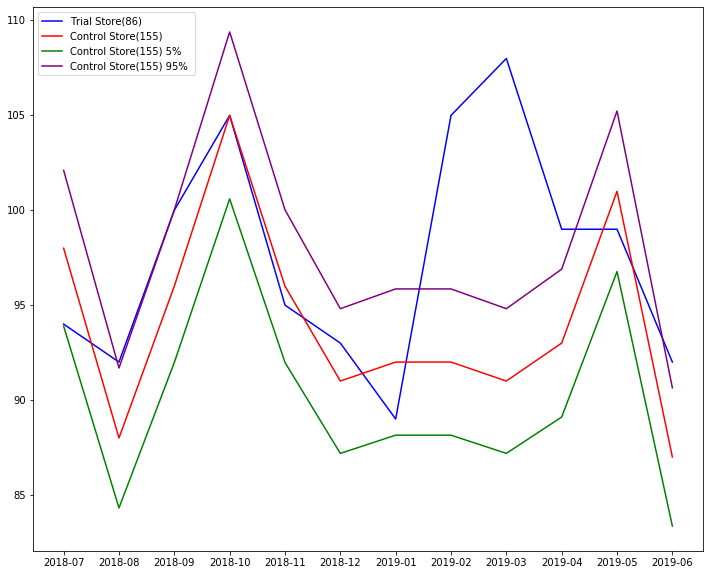

In [203]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(111)

ax1.plot(allCustomersTrial['MONTH_YEAR'], allCustomersTrial['TOT_CUSTOMERS'], c='b', label='Trial Store(86)')
ax1.plot(allCustomersControl['MONTH_YEAR'],allCustomersControl['TOT_CUSTOMERS'], c='r', label='Control Store(155)')
ax1.plot(allCustomersControl_05['MONTH_YEAR'],allCustomersControl_05['TOT_CUSTOMERS'], c='g', label='Control Store(155) 5% ')
ax1.plot(allCustomersControl_95['MONTH_YEAR'],allCustomersControl_95['TOT_CUSTOMERS'], c='purple', label='Control Store(155) 95% ')
plt.legend(loc='upper left')
plt.show()

Number of customers are significantly higher than the control store in trial period but the sales in both control and trial store are quite similar.

Trial Store 88

Correlation and Magnitude:

In [146]:
metric = 'TOT_SALES'
trial = 88
corr_88Sales = pd.DataFrame({'STORE_NBR':pre_trial['STORE_NBR'].unique()})
corr_88Sales['CORR_SALES'] = calculateCorrelation(pre_trial['STORE_NBR'].unique(),metric,trial)

In [147]:
metric = 'TOT_CUSTOMERS'
trial = 88
corr_88Customers = pd.DataFrame({'STORE_NBR':pre_trial['STORE_NBR'].unique()})
corr_88Customers['CORR_CUSTOMERS'] = calculateCorrelation(pre_trial['STORE_NBR'].unique(),metric,trial)

In [148]:
metric = 'TOT_SALES'
trial = 88
months = ['2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2019-01']
magnitude_88Sales = pd.DataFrame({'STORE_NBR':pre_trial['STORE_NBR']})
magnitude_88Sales['MONTH_YEAR'] = pre_trial['MONTH_YEAR']
magnitude_88Sales['MAG_SALES'] = calculateMagnitudeDistance(pre_trial['STORE_NBR'].unique(),metric,trial, months)

In [149]:
metric = 'TOT_CUSTOMERS'
trial = 88
months = ['2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2019-01']
magnitude_88Customers = pd.DataFrame({'STORE_NBR':pre_trial['STORE_NBR']})
magnitude_88Customers['MONTH_YEAR'] = pre_trial['MONTH_YEAR']
magnitude_88Customers['MAG_CUSTOMERS'] = calculateMagnitudeDistance(pre_trial['STORE_NBR'].unique(),metric,trial, months)

In [150]:
months_list = ['2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2019-01']
magnitude_88Sales['STD_SALES'] = calculateMinMax(magnitude_88Sales,magnitude_88Sales['STORE_NBR'].unique(),'MAG_SALES', months_list)

In [151]:
months_list = ['2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2019-01']
magnitude_88Customers['STD_CUSTOMERS'] = calculateMinMax(magnitude_88Customers,magnitude_88Customers['STORE_NBR'].unique(),'MAG_CUSTOMERS', months_list)

Combined score composed of Correlation and Magnitude

In [152]:
corr_metric = 'CORR_SALES'
mag_metric = 'STD_SALES'
months = ['2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2019-01']
score_88Sales = pd.DataFrame({'STORE_NBR':pre_trial['STORE_NBR']})
score_88Sales['MONTH_YEAR'] = pre_trial['MONTH_YEAR']
score_88Sales['AVERAGE_SALES'] = combineValues(corr_88Sales,magnitude_88Sales,corr_metric,mag_metric,
                                         magnitude_88Sales['STORE_NBR'].unique(), months)

In [153]:
corr_metric = 'CORR_CUSTOMERS'
mag_metric = 'STD_CUSTOMERS'
months = ['2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2019-01']
score_88Customers = pd.DataFrame({'STORE_NBR':pre_trial['STORE_NBR']})
score_88Customers['MONTH_YEAR'] = pre_trial['MONTH_YEAR']
score_88Customers['AVERAGE_CUSTOMERS'] = combineValues(corr_88Customers,magnitude_88Customers,corr_metric,mag_metric,
                                         magnitude_88Customers['STORE_NBR'].unique(), months)

In [154]:
score_88_Control = pd.merge(score_88Sales, score_88Customers, on=['STORE_NBR','MONTH_YEAR'],how='inner')
score_88_Control.head()

,STORE_NBR,MONTH_YEAR,AVERAGE_SALES,AVERAGE_CUSTOMERS
0,1,2018-07,0.496558,0.401980
1,1,2018-08,0.485144,0.373525
2,1,2018-09,0.516042,0.446081
3,1,2018-10,0.486088,0.371768
4,1,2018-11,0.488806,0.388542


In [155]:
score_88_Control['finalControlScore'] = 0.5*score_88_Control['AVERAGE_SALES'] + 0.5*score_88_Control['AVERAGE_CUSTOMERS']
score_88_Control.head()

,STORE_NBR,MONTH_YEAR,AVERAGE_SALES,AVERAGE_CUSTOMERS,finalControlScore
0,1,2018-07,0.496558,0.401980,0.449269
1,1,2018-08,0.485144,0.373525,0.429334
2,1,2018-09,0.516042,0.446081,0.481062
3,1,2018-10,0.486088,0.371768,0.428928
4,1,2018-11,0.488806,0.388542,0.438674


In [156]:
avg_control_score_88 = {}
control_stores = score_88_Control['STORE_NBR'].unique()
for c in control_stores:
    avg_control_score_88[c] = round(score_88_Control['finalControlScore'][(score_88_Control['STORE_NBR'] == c)].mean(),2)    

Sort scores, the control score next to trial store(88) has similar trend to it.

In [157]:
avg_control_score_88 = {k: v for k, v in sorted(avg_control_score_88.items(), key=lambda item: item[1])}
print(avg_control_score_88)

{141: -0.22, 135: -0.14, 266: -0.14, 235: -0.13, 239: -0.13, 258: -0.13, 264: -0.13, 90: -0.12, 52: -0.11, 197: -0.11, 2: -0.1, 8: -0.1, 74: -0.1, 87: -0.1, 98: -0.1, 151: -0.1, 215: -0.1, 263: -0.1, 214: -0.09, 42: -0.08, 16: -0.07, 256: -0.07, 272: -0.04, 146: -0.03, 185: -0.02, 189: -0.02, 224: -0.02, 73: -0.01, 267: -0.01, 143: -0.0, 255: 0.01, 34: 0.02, 54: 0.02, 169: 0.02, 186: 0.02, 96: 0.03, 126: 0.03, 68: 0.04, 127: 0.04, 209: 0.05, 29: 0.06, 111: 0.06, 115: 0.06, 120: 0.06, 173: 0.06, 48: 0.07, 82: 0.07, 192: 0.07, 244: 0.07, 12: 0.08, 22: 0.08, 23: 0.08, 110: 0.08, 139: 0.08, 175: 0.08, 205: 0.08, 249: 0.08, 9: 0.09, 37: 0.09, 176: 0.09, 227: 0.09, 66: 0.1, 89: 0.1, 133: 0.1, 19: 0.11, 51: 0.11, 158: 0.11, 220: 0.11, 17: 0.12, 47: 0.12, 118: 0.12, 183: 0.12, 251: 0.12, 50: 0.13, 108: 0.13, 148: 0.13, 174: 0.13, 242: 0.13, 246: 0.13, 25: 0.14, 196: 0.14, 247: 0.14, 61: 0.15, 65: 0.15, 124: 0.15, 156: 0.15, 164: 0.15, 208: 0.15, 243: 0.15, 20: 0.16, 45: 0.16, 53: 0.16, 67: 0.1

I find control store 237 as the most similar to 88 trial store.

Visualize total sales of different store type(Pre trial).

In [158]:
measure_over_month_sales = measure_over_month[['STORE_NBR','MONTH_YEAR','TOT_SALES']]

In [159]:
trial_store = 88
control_store = 237
pastSalesTrial = measure_over_month_sales[['MONTH_YEAR','TOT_SALES']][(measure_over_month_sales['STORE_NBR'] == trial_store) & 
                                          (measure_over_month_sales['MONTH_YEAR'] < '2019-02')].reset_index(drop=True)
pastSalesControl = measure_over_month_sales[['MONTH_YEAR','TOT_SALES']][(measure_over_month_sales['STORE_NBR'] == control_store) & 
                                            (measure_over_month_sales['MONTH_YEAR'] < '2019-02')].reset_index(drop=True)

In [160]:
months = ['2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2019-01']
other_stores = np.setdiff1d(measure_over_month_sales['STORE_NBR'].unique(),[trial_store,control_store])
pastSalesOthers = pd.DataFrame({'MONTH_YEAR':measure_over_month_sales['MONTH_YEAR'].unique()[0:7]})
avg_sales = []

for m in months:
    measure = measure_over_month_sales['TOT_SALES'][(measure_over_month_sales['STORE_NBR'].isin(other_stores)) & 
                             (measure_over_month_sales['MONTH_YEAR'] == m)]
    avg_sales.append(measure.mean())
    
pastSalesOthers['AVG_SALES'] = avg_sales
pastSalesOthers

,MONTH_YEAR,AVG_SALES
0,2018-07,579.805725
1,2018-08,555.011303
2,2018-09,562.772137
3,2018-10,573.749810
4,2018-11,561.000382
5,2018-12,590.092720
6,2019-01,571.880077


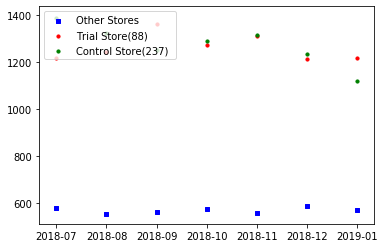

In [161]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(pastSalesOthers['MONTH_YEAR'], pastSalesOthers['AVG_SALES'], s=10, c='b', marker="s", label='Other Stores')
ax1.scatter(pastSalesTrial['MONTH_YEAR'],pastSalesTrial['TOT_SALES'], s=10, c='r', marker="o", label='Trial Store(88)')
ax1.scatter(pastSalesControl['MONTH_YEAR'],pastSalesControl['TOT_SALES'], s=10, c='g', marker="o", label='Control Store(237) ')
plt.legend(loc='upper left')
plt.show()

Visualize number of customers per month(pre trial)

In [162]:
measure_over_month_customers = measure_over_month[['STORE_NBR','MONTH_YEAR','TOT_CUSTOMERS']]

In [163]:
trial_store = 88
control_store = 237
pastCustomersTrial = measure_over_month_customers[['MONTH_YEAR','TOT_CUSTOMERS']][(measure_over_month_customers['STORE_NBR'] == trial_store) & 
                                          (measure_over_month_customers['MONTH_YEAR'] < '2019-02')].reset_index(drop=True)
pastCustomersControl = measure_over_month_customers[['MONTH_YEAR','TOT_CUSTOMERS']][(measure_over_month_customers['STORE_NBR'] == control_store) & 
                                            (measure_over_month_customers['MONTH_YEAR'] < '2019-02')].reset_index(drop=True)

In [164]:
months = ['2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2019-01']
other_stores = np.setdiff1d(measure_over_month_customers['STORE_NBR'].unique(),[trial_store,control_store])
pastCustomersOthers = pd.DataFrame({'MONTH_YEAR':measure_over_month_customers['MONTH_YEAR'].unique()[0:7]})
avg_customers = []

for m in months:
    measure = measure_over_month_customers['TOT_CUSTOMERS'][(measure_over_month_customers['STORE_NBR'].isin(other_stores)) & 
                             (measure_over_month_customers['MONTH_YEAR'] == m)]
    avg_customers.append(measure.mean())
    
pastCustomersOthers['AVG_CUSTOMERS'] = avg_customers
pastCustomersOthers

,MONTH_YEAR,AVG_CUSTOMERS
0,2018-07,66.610687
1,2018-08,66.605364
2,2018-09,64.790076
3,2018-10,65.771863
4,2018-11,64.885496
5,2018-12,67.766284
6,2019-01,65.812261


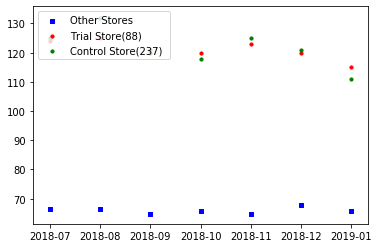

In [165]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(pastCustomersOthers['MONTH_YEAR'], pastCustomersOthers['AVG_CUSTOMERS'], s=10, c='b', marker="s", label='Other Stores')
ax1.scatter(pastCustomersTrial['MONTH_YEAR'],pastCustomersTrial['TOT_CUSTOMERS'], s=10, c='r', marker="o", label='Trial Store(88)')
ax1.scatter(pastCustomersControl['MONTH_YEAR'],pastCustomersControl['TOT_CUSTOMERS'], s=10, c='g', marker="o", label='Control Store(237) ')
plt.legend(loc='upper left')
plt.show()

Comparison of results in trial period.

In [166]:
scaling_factor = pastSalesTrial['TOT_SALES'].sum()/pastSalesControl['TOT_SALES'].sum()
scaling_factor

0.9907684714697539

In [168]:
salesControl_237 = pd.DataFrame({'MONTH_YEAR':measure_over_month_sales['MONTH_YEAR'].unique()})
salesControl_237['CONTROL_SALES'] = measure_over_month_sales[['TOT_SALES']][measure_over_month_sales['STORE_NBR'] == control_store].reset_index(drop=True) * scaling_factor
salesControl_237

,MONTH_YEAR,CONTROL_SALES
0,2018-07,1374.394024
1,2018-08,1309.696842
2,2018-09,1239.253204
3,2018-10,1275.218100
4,2018-11,1303.851308
5,2018-12,1223.004601
6,2019-01,1107.381921
7,2019-02,1300.879003
8,2019-03,1166.728952
9,2019-04,1142.950509


In [169]:
percentageDiff_88_237 = pd.DataFrame({'MONTH_YEAR':measure_over_month_sales['MONTH_YEAR'].unique()})
salesTrial_88 = measure_over_month_sales[['TOT_SALES']][(measure_over_month_sales['STORE_NBR'] == trial_store)].reset_index(drop=True)
percentageDiff_88_237['%Diff'] = abs(salesControl_237['CONTROL_SALES'] - salesTrial_88['TOT_SALES'])/salesControl_237['CONTROL_SALES']
percentageDiff_88_237

,MONTH_YEAR,%Diff
0,2018-07,0.113646
1,2018-08,0.051536
2,2018-09,0.098888
3,2018-10,0.003465
4,2018-11,0.005790
5,2018-12,0.008180
6,2019-01,0.097544
7,2019-02,0.029765
8,2019-03,0.257361
9,2019-04,0.152281


 As our null hypothesis is that the trial period is the same as the pre-trial
period, let's take the standard deviation based on the scaled percentage difference
in the pre-trial period 

In [170]:
standardDev_88_237 = percentageDiff_88_237['%Diff'][percentageDiff_88_237['MONTH_YEAR'] < '2019-02'].std()
standardDev_88_237

0.04907815778187752

In [171]:
months = ['2019-02','2019-03','2019-04']
stores_TValues_88_237 = pd.DataFrame({'TRANSACTION_MONTH':months})
tvalues = []
for m in months:
    tvalues.append((percentageDiff_88_237['%Diff'][percentageDiff_88_237['MONTH_YEAR'] == m].values[0] - 0)/standardDev_88_237)
stores_TValues_88_237['TVALUE'] = tvalues

In [172]:
stores_TValues_88_237.head()

,TRANSACTION_MONTH,TVALUE
0,2019-02,0.606487
1,2019-03,5.243910
2,2019-04,3.102824


Sales:

In [204]:
trial_store = 88
control_store = 237
allSalesTrial = measure_over_month_sales[['MONTH_YEAR','TOT_SALES']][(measure_over_month_sales['STORE_NBR'] == trial_store)].reset_index(drop=True)
allSalesControl = measure_over_month_sales[['MONTH_YEAR','TOT_SALES']][(measure_over_month_sales['STORE_NBR'] == control_store)].reset_index(drop=True)

In [205]:
allSalesControl_95['MONTH_YEAR'] = allSalesControl[['MONTH_YEAR']]
allSalesControl_05 = allSalesControl[['MONTH_YEAR']]

allSalesControl_95['TOT_SALES'] = allSalesControl[['TOT_SALES']]*(1 + standardDev_88_237 * 2)
allSalesControl_05['TOT_SALES'] = allSalesControl[['TOT_SALES']]*(1 - standardDev_88_237 * 2)

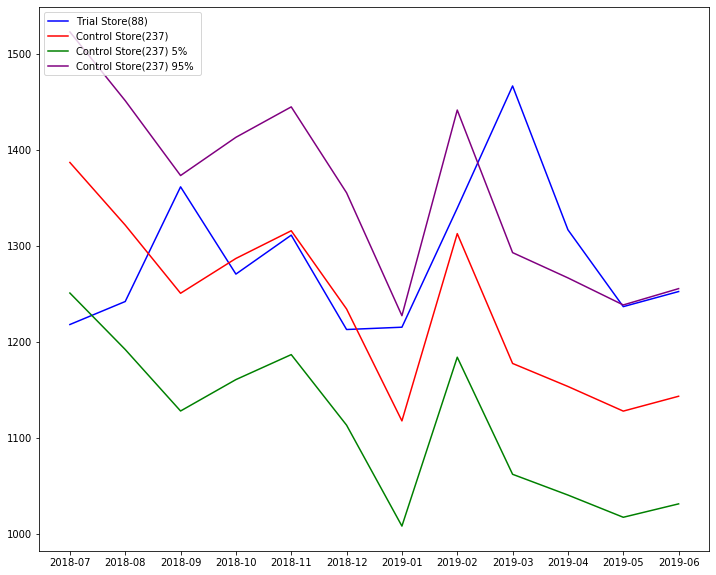

In [206]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(111)

ax1.plot(allSalesTrial['MONTH_YEAR'], allSalesTrial['TOT_SALES'], c='b', label='Trial Store(88)')
ax1.plot(allSalesControl['MONTH_YEAR'],allSalesControl['TOT_SALES'], c='r', label='Control Store(237)')
ax1.plot(allSalesControl_05['MONTH_YEAR'],allSalesControl_05['TOT_SALES'], c='g', label='Control Store(237) 5% ')
ax1.plot(allSalesControl_95['MONTH_YEAR'],allSalesControl_95['TOT_SALES'], c='purple', label='Control Store(237) 95% ')
plt.legend(loc='upper left')
plt.show()

Customers:

In [207]:
trial_store = 88
control_store = 237
allCustomersTrial = measure_over_month_customers[['MONTH_YEAR','TOT_CUSTOMERS']][(measure_over_month_customers['STORE_NBR'] == trial_store)].reset_index(drop=True)
allCustomersControl = measure_over_month_customers[['MONTH_YEAR','TOT_CUSTOMERS']][(measure_over_month_customers['STORE_NBR'] == control_store)].reset_index(drop=True)

In [208]:
allCustomersControl_95 = allCustomersControl[['MONTH_YEAR']]
allCustomersControl_05 = allCustomersControl[['MONTH_YEAR']]

allCustomersControl_95['TOT_CUSTOMERS'] = allCustomersControl[['TOT_CUSTOMERS']]*(1 + standardDev_88_237 * 2)
allCustomersControl_05['TOT_CUSTOMERS'] = allCustomersControl[['TOT_CUSTOMERS']]*(1 - standardDev_88_237 * 2)

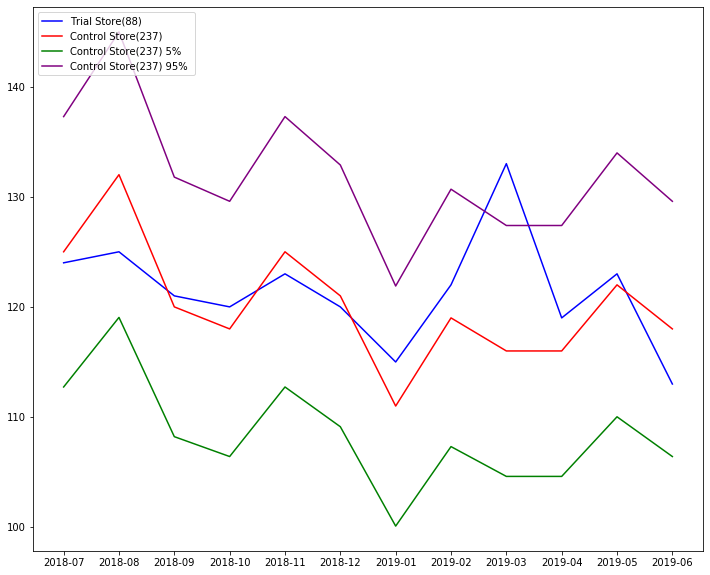

In [209]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(111)

ax1.plot(allCustomersTrial['MONTH_YEAR'], allCustomersTrial['TOT_CUSTOMERS'], c='b', label='Trial Store(88)')
ax1.plot(allCustomersControl['MONTH_YEAR'],allCustomersControl['TOT_CUSTOMERS'], c='r', label='Control Store(237)')
ax1.plot(allCustomersControl_05['MONTH_YEAR'],allCustomersControl_05['TOT_CUSTOMERS'], c='g', label='Control Store(237) 5% ')
ax1.plot(allCustomersControl_95['MONTH_YEAR'],allCustomersControl_95['TOT_CUSTOMERS'], c='purple', label='Control Store(237) 95% ')
plt.legend(loc='upper left')
plt.show()

Both Number of customers and the sales in both control and trial store are quite similar.